In [41]:
import os
import random 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import cv2

In [29]:
IMG_PATH = "./data/aug/images/1_MWII-S03-ANNOUNCEMENT-036-Bjpeg_jpg.rf.1c9dea32bc374ce4864522184af45b6e.jpg"
BB_PATH = "./data/aug/labels/1_MWII-S03-ANNOUNCEMENT-036-Bjpeg_jpg.rf.1c9dea32bc374ce4864522184af45b6e.txt"

In [5]:
def read_img(img_path:str):
    return cv2.imread(img_path)

In [6]:
def read_bb(bb_file_path:str):
    with open(bb_file_path, "r") as file:
        return file.readlines()

In [50]:
def viz(img_path:str, bb_file_path:str):
    color = [random.randint(0, 255) for _ in range(3)]
    
    img = read_img(img_path)
    bb_info_arr = read_bb(bb_file_path)

    H, W, channels = img.shape
    
    for bb in bb_info_arr:
        bb_coord_arr = bb.split()
        print(bb_coord_arr)
        _, x_center, y_center, w, h = bb_coord_arr
        x_center, y_center, w, h = float(x_center), float(y_center), float(w), float(h)
        
        w = float(w*W)
        h = float(h*H)

        x = float(x_center*W - (w/2))
        y = float(y_center*H - (h/2))

        x1 = round(x)
        y1 = round(y)
        x2 = round(x+w)
        y2 = round(y+h)
        
        cv2.rectangle(img, (x1,y1), (x2,y2), color, cv2.LINE_4)
        return cv2.circle(img, (round(x_center*W), round(y_center*H)), radius=0, color=(255,0,0), thickness=0)

In [56]:
def aug(img_path:str, bb_file_path:str, augmentation:int=0.20):
    color = [random.randint(0, 255) for _ in range(3)]
    
    img = read_img(img_path)
    bb_info_arr = read_bb(bb_file_path)
    
    H, W, _ = img.shape
    
    for bb in bb_info_arr:
        bb_coord_arr = bb.split()
        bb_class, x_center, y_center, w, h = bb_coord_arr
        x_center, y_center, w, h = float(x_center), float(y_center), float(w), float(h)
        
        if x_center + w + augmentation <= W:
            w = w+augmentation
        else:
            w = W
            
        if y_center + h + augmentation <= H:
            h = h+augmentation
        else:
            h = H

        with open(bb_file_path, "w") as file:
            file.write(f"{bb_class} {x_center} {y_center} {w} {h}")
   

In [39]:
aug(IMG_PATH, BB_PATH)

['0', '0.275', '0.53359375', '0.30390625', '0.30703125']
['0', '0.240625', '0.56484375', '0.3375', '0.421875']
['0', '0.29296875', '0.29921875', '0.5734375', '0.48125']
['0', '0.5640625', '0.4828125', '0.346875', '0.39765625']
['0', '0.76328125', '0.62890625', '0.38671875', '0.74140625']
['0', '0.52421875', '0.56640625', '0.17578125', '0.50078125']


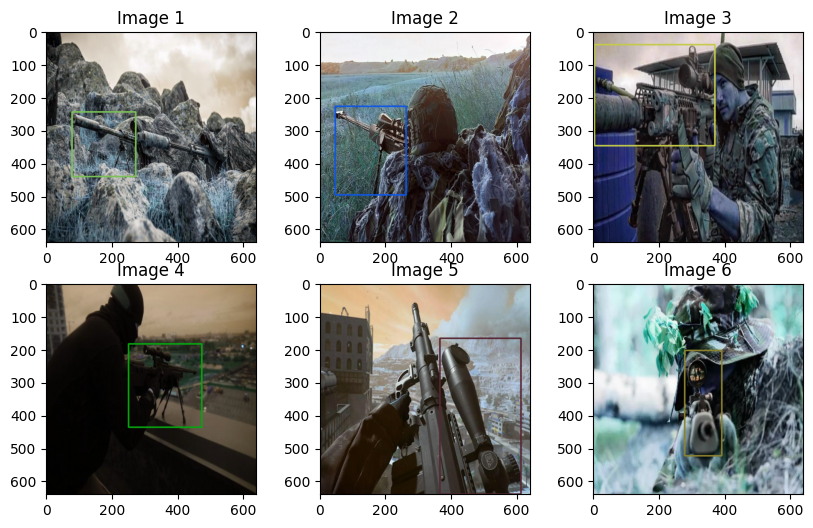

In [53]:
IMG = os.listdir("./data/aug/images/")
BB = os.listdir("./data/aug/labels/")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
imgs = []

for f in BB:
    imgs.append(viz("./data/aug/images/"+f[:-3]+"jpg", "./data/train/labels/"+f))
    
for i, ax in enumerate(axes.ravel()):
    ax.imshow(imgs[i], cmap='viridis')
    ax.set_title(f'Image {i + 1}')
    
plt.show()
    

['0', '0.64140625', '0.5671875', '0.6171875', '0.42578125']
['0', '0.240625', '0.56484375', '0.5375000000000001', '0.621875']
['0', '0.29296875', '0.29921875', '0.7734375', '0.68125']
['0', '0.5640625', '0.4828125', '0.546875', '0.59765625']
['0', '0.76328125', '0.62890625', '0.58671875', '0.94140625']
['0', '0.52421875', '0.56640625', '0.37578125', '0.7007812499999999']


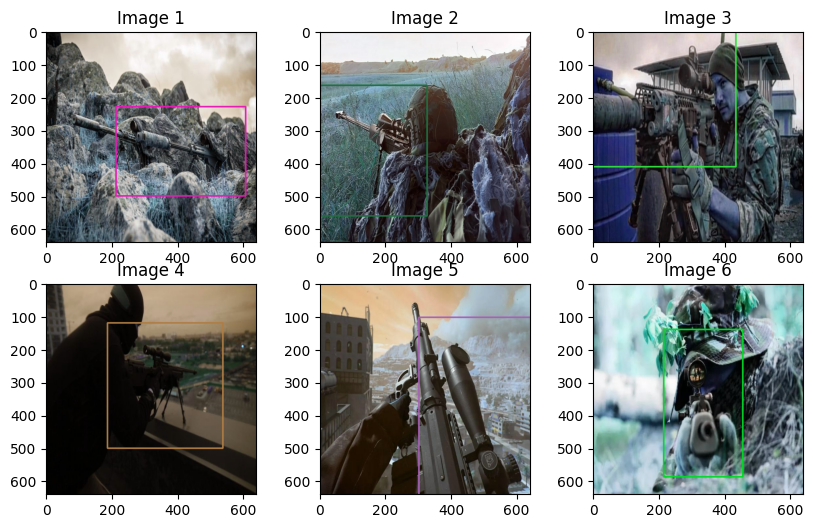

In [57]:
IMG = os.listdir("./data/aug/images/")
BB = os.listdir("./data/aug/labels/")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
imgs = []

for f in BB:
    aug("./data/aug/images/"+f[:-3]+"jpg", "./data/aug/labels/"+f)
    imgs.append(viz("./data/aug/images/"+f[:-3]+"jpg", "./data/aug/labels/"+f))
    
for i, ax in enumerate(axes.ravel()):
    ax.imshow(imgs[i], cmap='viridis')
    ax.set_title(f'Image {i + 1}')
    
plt.show()